# Principle Component Analysis (PCA) of Gaussian Data

In this lab, we are going to generate random data $\{ x_j \in \mathbb{R}^2 : 1 \leq j \leq n\}$ from a bi-variate Gaussian distribution and use PCA to find a one-dimensional representation of it as the points $\{ y_j \in \mathbb{R} : 1 \leq j \leq n\}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### The code below is provided to generate the random input data

(-10.0, 10.0)

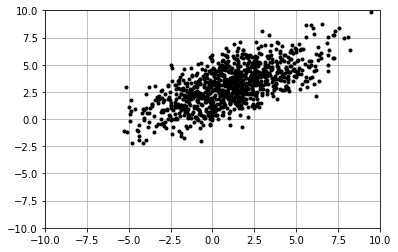

In [2]:
# Parameters
n = 1000                                # number of data points
d = 2                                   # dimension of data points
input_mean_vector = (1, 3)              # mean vector for generating input data
input_cov_matrix = np.array([[6, 3],
                             [3, 3.5]]) # covariance matrix for generating input data

# Generate data with each column of input_X being a sample x_j
input_X = np.random.multivariate_normal(input_mean_vector, input_cov_matrix, size = n)
input_X = input_X.T

# Plot
fig = plt.figure()
plt.plot(input_X[0,:],input_X[1,:], '.', color='k')
plt.grid()
plt.xlim((-10, 10))
plt.ylim((-10,10))

### Let's now implement PCA
Note that the variable `input_X` is of dimension $d \times n$ so the $j$-th data sample $x_j \in \mathbb{R}^d$ is accessed stored in the variable `input_X[:,j-1]`

1. Compute the mean vector of the data $\mu = 1/n \sum_{j = 1}^n x_j$ and subtract it from the data to compute the mean-subtracted (or centered data) $\tilde{x}_j = x_j - \mu$.

In [3]:
mu = np.mean(input_X,axis=1) # Compute mean
tilde_X = np.zeros_like(input_X)
for j in range(n):
    tilde_X[:,j] = input_X[:,j] - mu


2. Compute the data matrix $X = \begin{bmatrix} \tilde{x}_1 & \tilde{x}_2 & \cdots & \tilde{x}_n \end{bmatrix}$ and the covariance matrix $C = \frac{1}{n} XX^T$.

In [4]:
X = tilde_X
C = 1/n*X@X.T

3. Compute eigenvalues and eigenvectors of the covariance matrix C

In [5]:
Lambda, V = np.linalg.eig(C)

4. Select the eigenvectors $u_1, u_2, \ldots, u_k$ corresponding to the $k$ largest eigenvalues of $C$ (we only want $k = 1$ here).

In [6]:
k = np.argmax(Lambda) # index of maximum eigenvalue
u1 = V[:,k]           # corresponding eigenvector (first principle component)

5. Compute the lower-dimensional output via $y_j = A^T\tilde{x}_j$ where $A = \begin{bmatrix} u_1 & u_2 & \cdots & u_k \end{bmatrix}$.

In [7]:
y = np.zeros((n,1))
for j in range(n):
    y[j] = u1.T@X[:,j]

6. Reconstruct the input data from the lower-dimensional output $y_j$ via $\hat{x}_j = Ay_j + \mu$. Plot the reconstructions and the input data on the same plot.

(-10.0, 10.0)

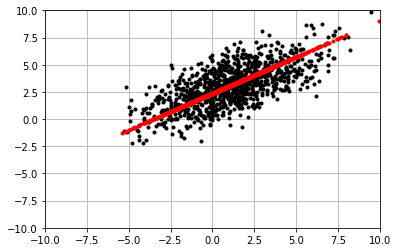

In [14]:
hat_X = np.zeros_like(X)
for j in range(n):
    hat_X[:,j] = u1*y[j] + mu

# Plot reconstuction
fig = plt.figure()
plt.plot(input_X[0,:],input_X[1,:], '.', color='k')
plt.plot(hat_X[0,:],hat_X[1,:], '.', color='r')
plt.grid()
plt.xlim((-10, 10))
plt.ylim((-10,10))